In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv('HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
df.shape

(506, 14)

In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
mean_value = df['CRIM'].mean()
means = df.mean()
df.fillna(value = means,inplace = True)
print(df.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [11]:
target_feature = 'MEDV'
x = df.drop(target_feature,axis = 1)
y = df[target_feature]

In [13]:
#Creating of Model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
Regression = LinearRegression()
Regression.fit(x_train,y_train)

LinearRegression()

In [16]:
#Calculating score,prediction,coeffcient,r2_score,root-mean-squared-error
train_score = round(Regression.score(x_train,y_train)*100,2)
print("Score: ",train_score)

Score:  76.49


In [17]:
print("Coeffcient: ",Regression.coef_)

Coeffcient:  [-1.26194005e-01  3.76363553e-02 -6.26295345e-02  2.70382928e+00
 -1.45015824e+01  4.08006958e+00 -2.11509464e-02 -1.41798662e+00
  1.96343241e-01 -8.70651696e-03 -1.01396225e+00  8.29504244e-03
 -4.19861039e-01]


In [18]:
predictions = Regression.predict(x_test)
predictions

array([26.175296  , 22.64747588, 29.1456294 , 11.52971235, 21.65312134,
       19.42320699, 20.18413017, 21.46914355, 19.1985363 , 19.98228162,
        4.32483046, 16.16891668, 16.87682404,  5.31232373, 39.36827861,
       33.09358732, 21.9152876 , 36.61918436, 31.52676377, 23.52713482,
       24.96022461, 23.69866912, 20.88033802, 30.55074901, 22.74081741,
        8.66805959, 17.65119072, 17.93088633, 36.01223185, 21.16299556,
       17.83464361, 17.43306603, 19.5240167 , 23.50605522, 28.97262793,
       19.21808862, 11.23997435, 23.94256597, 17.86786717, 15.40849806,
       26.3630836 , 21.5193299 , 23.78733694, 14.84041522, 23.9445175 ,
       24.97067627, 20.11366175, 23.08636158, 10.42208266, 24.52832122,
       21.60847326, 18.66228165, 24.53362832, 31.03502944, 12.97457826,
       22.38536236, 21.34822822, 16.10928673, 12.37477824, 22.78596712,
       18.28714824, 21.91802045, 32.49771603, 31.21256855, 17.47867791,
       33.18861907, 19.17896285, 19.94662594, 20.17142015, 23.90

Text(0, 0.5, 'Prediction X')

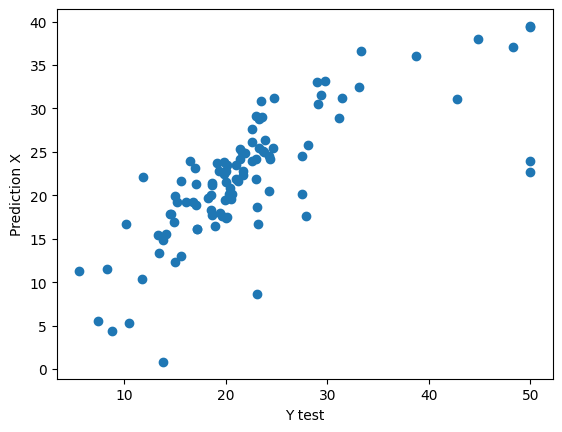

In [19]:
plt.scatter(y_test,predictions)
plt.xlabel("Y test")
plt.ylabel("Prediction X")

In [21]:
score = round(r2_score(y_test,predictions)*100,2)
print("R2 Score: ",score)

R2 Score:  57.03


In [23]:
print(round(Regression.score(x_test,y_test)*100,2))

57.03


In [30]:
# from sklearn import metrics
print("MAE on test data of LR: ",metrics.mean_absolute_error(y_test,predictions))
print("MSE on test data of LR: ",metrics.mean_squared_error(y_test,predictions))
print("RMSE on test data of LR: ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE on test data of LR:  3.9616211239591186
MSE on test data of LR:  34.98738954423878
RMSE on test data of LR:  5.915013909048632


In [34]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted':predictions ,'Variance':y_test-predictions})
df1.head()

,Actual,Predicted,Variance
329,22.6,26.175296,-3.575296
371,50.0,22.647476,27.352524
219,23.0,29.145629,-6.145629
403,8.3,11.529712,-3.229712
78,21.2,21.653121,-0.453121
